In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [ ]:

'''
实现中遇到的问题：
０．　数据集：
    使用的是iris鸢尾花数据集，ｘ有四种特征，ｙ有三类：０，１，-1，每一类有５０个样本，总共１５０个样本
    对于数据集，０和１对应的数据是线性可分的。
１．　哇，数据集对应散点图，竟然有些绕不明白：
    为便于结果的观察，这里只取两个特征，ｓｌ和ｓｗ，取０和１两个类别
    所以画散点图观察是否线性可分时，ｘ对应ｓｌ特征，ｙ对应ｓｗ特征，每个点的类别用点的ｌａｂｅｌ的颜色区分
２．　dataframe.iloc的使用：
    一日不练百日空啊，已经又忘记这个用法了
    官方解释：Purely integer-location based indexing for selection by position
    允许输入integer,list,slice,boolean array,callable func
    需要记住一点即可：确定好对应哪个ａｘｉｓ，选择什么数据就行
    比如df.iloc[:,[0,1,-1]]就是选择所有行，选择第一、二、最后一列的数据
３．　wx的计算：
    np.dot(w,x)
    因为这里的ｗ和ｘ都是一维数组，这里就是计算内积：挨个相乘相加;如果是dot(多维张量，向量)，就是多维的最后一维和向量相乘相加；
    如果是dot(多维，多维)就是矩阵相乘，第一个多维的最后一维和第二个多维的倒数第二维进行相乘。
４．　模型写好并训练得出ｗ和ｂ后，画图展示这个超平面：
    就是画wx+b=0这条线
    这里又懵了一会儿，想想对应的ｘ和ｙ轴实际上是样本ｘ的两个特征ｓｌ和ｓｗ，所以对ｓｌ随机选取范围（４，７）内的数后，
    就可以根据上面的方程计算ｓｗ，
    就是下面的实现：
    sw=-(perception.w[0]*sl+perception.b)/perception.w[1]
    
综上，其实有了ｄａｔａ和ｍｏｄｅｌ这两个框架（比如我参照https://github.com/wzyonggege/statistical-learning-method/blob/master/Perceptron/Iris_perceptron.ipynb
代码结构，把ｍｏｄｅｌ类的骨架确定了，最后的ｔｒａｉｎ　ｌｏｏｐ和梯度更新这里真的很简单，重在理解《统计学习方法》里的感知机模型算法）后，其实感知机模型本身部分非常好写，只要理解了感知机模型的内在算法原理。
反而是别的数据预处理和结果的展示花了比较多时间，不过这个真的能加深对数据的理解，还是很值。

'''

In [ ]:
#load data
data=load_iris()
# print(data)
df=pd.DataFrame(data.data,columns=data.feature_names)
df['label']=data.target
df.columns=['sl','sw','pl','pw','label']

# print(df.label.value_counts())


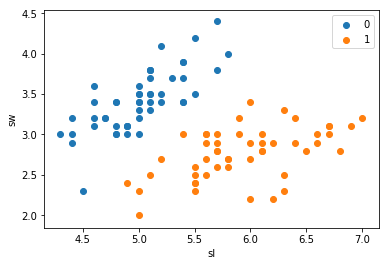

In [37]:
# 画图，看数据分布
plt.scatter(df.iloc[:50,0],df.iloc[:50,1],label='0')
plt.scatter(df.iloc[50:100,0],df.iloc[50:100,1],label='1')
# plt.scatter(df.iloc[:50,2],df.iloc[:50,3],label='0')
# plt.scatter(df.iloc[50:100,2],df.iloc[50:100,3],label='1')
plt.xlabel('sl')
plt.ylabel('sw')
plt.legend()

In [32]:
# X,y
X=np.array(df.iloc[:100,[0,1]])
y=np.array(df.iloc[:100,-1])

y=np.array([-1 if i==0 else 1 for i in y  ])
print(np.shape(X[0]))
print(np.shape([[0],[1]]))
# print(X,y)

(2,)
(2, 1)


In [39]:
# 感知机模型
class Model:
    def __init__(self,w,b,lr):
        self.w=w
        self.b=b
        self.lr=lr
    
    def linear_func(self,x):
        
        return np.dot(x,self.w)+self.b
    
    def fit(self,X_train,y_train):
        has_wrong=True
        while has_wrong:
            wrong_ct=0
            for i in range(0,len(y_train)):
                xi=X_train[i]
                yi=y_train[i]
                if yi * self.linear_func(xi)<=0:
                    self.w=self.w+self.lr * yi * xi
                    self.b=self.b+self.lr * yi
                    wrong_ct+=1
            if wrong_ct==0:
                has_wrong=False
        return 'perception model success!'


In [40]:
# 训练模型，得到ｗ和ｂ
# 本例中shape(w)=(2,)即是一个长度为２的一位数组
# 样本也是这样的
w=np.ones(len(X[0]),dtype=np.float32)
print(np.shape(w))
b=0
lr=1
perception = Model(w,b,1)
perception.fit(X,y)

(2,)


'perception model success!'

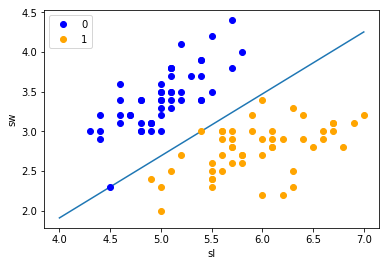

In [43]:
# print(perception.w,perception.b)
# 画图展示
sl=np.linspace(4,7,10)
# (w1,w2)*(sl,sw)+b=0
# sw=-(w1*sl+b)/w2
sw=-(perception.w[0]*sl+perception.b)/perception.w[1]
plt.plot(sl,sw)
plt.plot(X[:50,0],X[:50,1],'bo',color='blue',label='0')
plt.plot(X[50:,0],X[50:,1],'bo',color='orange',label='1')
plt.xlabel('sl')
plt.ylabel('sw')
plt.legend()

In [45]:
# scikit-learn perception
from sklearn.linear_model import Perceptron
per=Perceptron(fit_intercept=False,shuffle=False,n_iter=1000)
per.fit(X,y)
#权重ｗ
print(per.coef_)
# 截距ｂ
print(per.intercept_)

[[  74.6 -127.2]]
[0.]


/home/lnn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


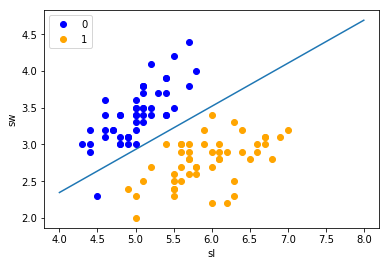

In [46]:
sl=np.linspace(4,8,10)
sw=-(per.coef_[0][0]*sl+per.intercept_)/per.coef_[0][1]
plt.plot(sl,sw)
plt.plot(X[:50,0],X[:50,1],'bo',color='blue',label='0')
plt.plot(X[50:,0],X[50:,1],'bo',color='orange',label='1')
plt.xlabel('sl')
plt.ylabel('sw')
plt.legend()
